<a href="https://colab.research.google.com/github/whitehatdevelop/PCA_breast_cancer/blob/main/Barrera_V%C3%A1squez_Quevedo_Cumpa_Ejercicio_3_ral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='#008B72'> Predicción del diagnóstico de cáncer: Reducción de dimensionalidad usando PCA. </font>

## Caso: Diagnóstico de cancer: Breast Cancer (Wisconsin) Dataset

Fuente del dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Se realizaron ensayos clínicos a pacientes, y se anotó el diagnóstico realizado por un médico con respecto a si tiene un cáncer maligno o benigno. El conjunto de datos contiene características calculadas a partir de una imagen digitalizada de una muestra extraída por *aspiración con aguja fina* ([FNA](https://en.wikipedia.org/wiki/Fine-needle_aspiration), por sus siglas en inglés) proveniente una masa mamaria. Los atributos describen características de los núcleos celulares presentes en la imagen, y son los siguientes:

- radius (promedio de las distancias desde el centro a los puntos de la periferia)
- texture (desviación estándar de los valores en escala de grises)
- perimeter
- area
- smoothness (variación local de las longitudes de los radios)
- compactness (perimeter^2 / area - 1.0)
- concavity (severidad de las porciones cóncavas del contorno)
- concave points (número de porciones cóncavas del contorno)
- symmetry
- fractal dimension ("coastline approximation" - 1)

La media, la desviación estándar y "peor" o mayor (media de los tres
valores más grandes) de cada una de estas características se calcularon para cada imagen, resultando en 30 atributos. Por ejemplo, la columna 0 es el radio medio, el atributo 10 es la SD del radio y la columna 20 es el peor radio.

Además, para el diagnóstico, `1` quiere decir que es un cáncer maligno y `0` que es un cáncer benigno.

## Solución desde el punto de vista de ML

De acuerdo al caso planteado, el objetivo del proyecto es poder realizar una estimación del diagnóstico que haría un médico, usando los atributos obtenidos de los ensayos clínicos. No se trata de reemplazar el expertiz de un profesional de la salud, sino poder tener una estimativa de la posible gravedad de un caso clínico para poder priorizar los recursos hospitalarios disponibles.

Completar con su código los campos indicados y subir su notebook solucionado al aula virtual.

## Obtención de los datos

In [14]:
#libraries required
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [15]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer() #esta función carga los atributos, el target y los nombres de las columnas

In [16]:
breast.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [17]:
breast_data = breast.data #atributos en un numpy array
breast_data.shape

(569, 30)

In [18]:
breast_labels = breast.target #labels en un numpy array
breast_labels.shape

(569,)

In [19]:
labels = np.reshape(breast_labels,(569,1))

In [20]:
features = breast.feature_names #vemos los nombres de los atributos
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Como se puede ver, el label no está considerado como columna. Vamos a agregarlo:

In [21]:
features_con_labels = np.append(features,'diagnostico')

Con ambos numpy arrays, vamos a crear un dataframe que contenga los atributos y el label.

In [22]:
full_breast_data = np.concatenate([breast_data,labels],axis=1)
full_breast_data.shape

(569, 31)

Creamos el dataframe que tiene todo el dataset.

In [23]:
breast_dataset = pd.DataFrame(full_breast_data)

Vamos a poner nombre a las columnas del dataframe:

In [24]:
breast_dataset.columns = features_con_labels

Exploremos del dataset listo:

In [25]:
breast_dataset.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostico
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [26]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [27]:
breast_dataset.tail() #imprimimos las 5 últimas muestras

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostico
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


Vamos a cambiar los labels de `0` y `1` a `'benigno'` y `maligno`:

In [28]:
breast_dataset['diagnostico'].replace(0, 'benigno',inplace=True)
breast_dataset['diagnostico'].replace(1, 'maligno',inplace=True)

In [29]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostico
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,benigno
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,benigno
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,benigno
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,benigno
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,maligno


In [30]:
breast_dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,benigno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,benigno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,benigno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,benigno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,benigno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,benigno
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,benigno
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,benigno
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,benigno


## Estandarización de los datos

Vamos a aplicar la [función](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) `StandardScaler` de sklearn, para que los datos estén distribuidos de forma que tengan media 0 y desviación estándar de 1. Sin embargo, se debe aplicar esta transformación a las columnas que son atributos, pero no al label (diagnóstico).

In [31]:
 #seleccionamos todas las filas, pero solamente las columnas cuyas etiquetas estén en la variable features
x = breast_dataset.loc[:, features].values

#la siguiente fila es un auto-verificador para que vean si realizaron correctamente la extracción
assert x.shape == (569,30), "La extracción de los datos para aplicar StandardScaler no está bien ejecutada"

In [32]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [33]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

## Principal Component Analysis (PCA) 2D

Por comodidad, cambiemos las etiquetas de las columnas a una forma más genérica:

In [34]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
feat_cols

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9',
 'feature10',
 'feature11',
 'feature12',
 'feature13',
 'feature14',
 'feature15',
 'feature16',
 'feature17',
 'feature18',
 'feature19',
 'feature20',
 'feature21',
 'feature22',
 'feature23',
 'feature24',
 'feature25',
 'feature26',
 'feature27',
 'feature28',
 'feature29']

In [35]:
normalised_dataset = pd.DataFrame(x,columns=feat_cols)

In [36]:
normalised_dataset.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,-0.070279,0.383092,-0.157449,-0.466152,0.049342,-1.163516,-1.057501,-1.913447,0.752830,-0.382754,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


Ejecutamos un análisis de componentes principales bidimensional:

In [37]:
from sklearn.decomposition import PCA
# TO DO ::: Completar código
# Use las líneas de código que necesite
pca = PCA(n_components=2)
# Esto para que nuestro PCA se ajuste a los datos de entrenamiento que tenemos como tal
pca.fit(normalised_dataset)
 # Configuramos los datos de entrenamiento 
 # Aplicamos PCA como tal al conjunto de datos
# pca_breast_dataset = pca.transform(normalised_dataset)
# pca_breast_dataset =    #...

principalComponents_breast_dataset = pca.transform(normalised_dataset)

Vamos a crear un nuevo dataframe con los componentes principales:

In [38]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast_dataset
             , columns = ['componente principal 1', 'componente principal 2'])

principal_breast_Df.tail()

,componente principal 1,componente principal 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


Computar el ratio de varianza explicada (`explained_variance_ratio`). Nos indica la cantidad de información (o varianza) que posee cada componente principal luego de proyectar los datos en un sub-espacio de una dimensión menor.

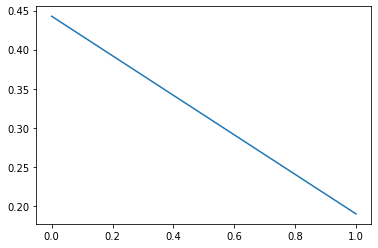

In [39]:
#Debe mostrar/imprimir el explained_variance_ratio para todos los componentes principales
#Eje X: números entre 0 y los números de componentes que escogimos (pca.explained_variance_)
#Eje Y: Valor de la importante de cada componente
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

Completar: Se observa que el primer componente principal tiene el 44% (estimado) de la información, y el segundo solamente el 18% (estimado). Al proyectar en un espacio de dimensión 2, se ha perdido aproximadamente un ... % de información.

### Interpretación gráfica del PCA

<Figure size 432x288 with 0 Axes>

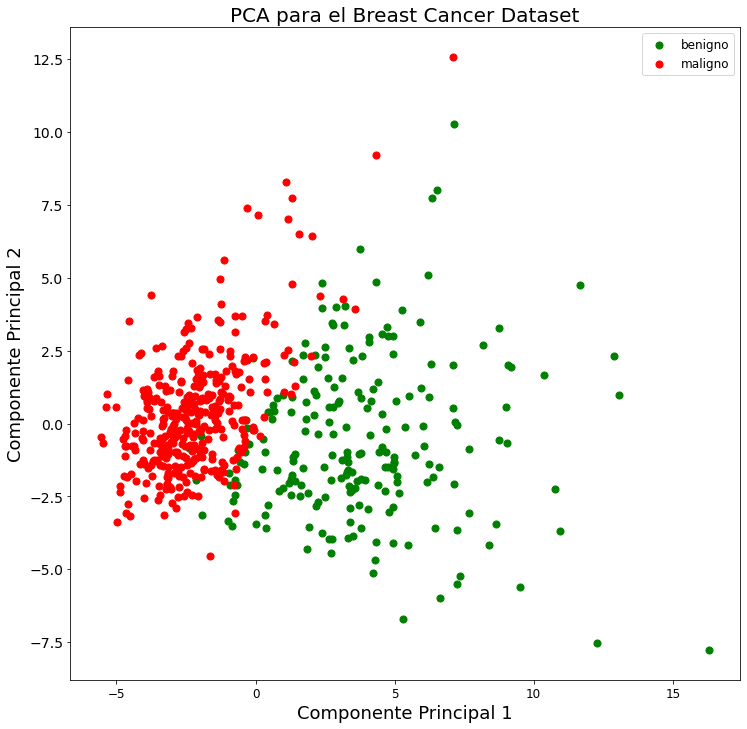

In [40]:
plt.figure()
plt.figure(figsize=(12,12))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente Principal 1',fontsize=18)
plt.ylabel('Componente Principal 2',fontsize=18)
plt.title("PCA para el Breast Cancer Dataset",fontsize=20)
targets = ['benigno', 'maligno']
colors = ['g', 'r']
for color, target in zip(colors, targets):
    index = breast_dataset['diagnostico'] == target
    plt.scatter(principal_breast_Df.loc[index, 'componente principal 1'] , principal_breast_Df.loc[index, 'componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 12})

De acuerdo a la gráfica, se observa que una línea recta podría dividir a los dos grupos de datos! Esta es una aplicación práctica de la utilidad de hacer PCA.

## Principal Component Analysis (PCA) 3D

Proceder análogamente, pero esta vez realizando un PCA tridimensional.

Ejecutamos un análisis de componentes principales 3D:

In [61]:
from sklearn.decomposition import PCA
pca_breast_dataset_3D = PCA(n_components=3)

pca_breast_dataset_3D.fit(normalised_dataset)

principal_breast_Df_3D = pca_breast_dataset_3D.transform(normalised_dataset)

In [62]:
principal_breast_Df_3D

array([[ 9.19283683,  1.94858308, -1.12316593],
       [ 2.3878018 , -3.76817174, -0.52929256],
       [ 5.73389628, -1.0751738 , -0.5517476 ],
       ...,
       [ 1.25617928, -1.90229672,  0.56273046],
       [10.37479406,  1.6720101 , -1.87702935],
       [-5.4752433 , -0.67063678,  1.49044345]])

Vamos a crear un nuevo dataframe con los componentes principales:

In [63]:
principal_breast_Df_3D = pd.DataFrame(data = principal_breast_Df_3D, columns = ['componente principal 1', 'componente principal 2', 'componente principal 3'])
principal_breast_Df_3D.tail()

,componente principal 1,componente principal 2,componente principal 3
564,6.439315,-3.576817,2.459487
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562730
567,10.374794,1.672010,-1.877029
568,-5.475243,-0.670637,1.490443


Computamos nuevamente el ratio de varianza explicada (`explained_variance_ratio`). Indicar el porcentaje de información que se pierde si en lugar de 2, se proyecta en 3 dimensiones.

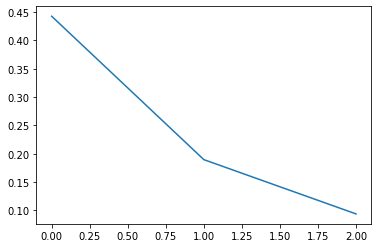

In [64]:
#Debe mostrar/imprimir el explained_variance_ratio para todos los componentes principales
#Eje X: números entre 0 y los números de componentes que escogimos (pca.explained_variance_)
#Eje Y: Valor de la importante de cada componente
plt.plot(range(len(pca_breast_dataset_3D.explained_variance_)), pca_breast_dataset_3D.explained_variance_ratio_)
plt.show()


Se observa que el tercer componente principal tiene el 10% de la información. Al proyectar en un espacio de dimensión 3, se ha perdido aproximadamente un ... % de información.

### Interpretación gráfica del PCA

In [65]:
principal_breast_Df_3D

,componente principal 1,componente principal 2,componente principal 3
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232789
4,3.935302,-1.948072,1.389767
...,...,...,...
564,6.439315,-3.576817,2.459487
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562730
567,10.374794,1.672010,-1.877029


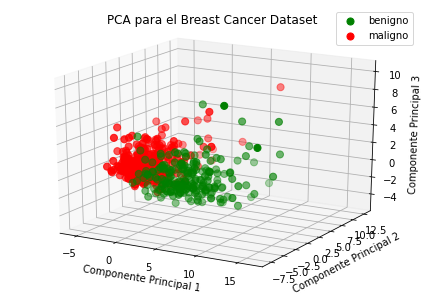

In [66]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()



plt.clf()

elev = +20
azim = -60

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title("PCA para el Breast Cancer Dataset")


targets = ['benigno', 'maligno']
colors = ['g', 'r']
for color, target in zip(colors, targets):
    index = breast_dataset['diagnostico'] == target
    ax.scatter(principal_breast_Df_3D.loc[index, 'componente principal 1'] , 
               principal_breast_Df_3D.loc[index, 'componente principal 2'], 
               principal_breast_Df_3D.loc[index, 'componente principal 3'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})